In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


# Task 1
Find Linear Regression equation

In [5]:
X= df[['Sex','Rank','Year','Degree','YSdeg']]

In [6]:
y=df['Salary']

In [7]:
X.head()

,Sex,Rank,Year,Degree,YSdeg
0,0,3,25,1,35
1,0,3,13,1,22
2,0,3,10,1,23
3,1,3,7,1,27
4,0,3,19,0,30


In [8]:
regr=linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [9]:
m=format(regr.coef_[0],'.2f')
c=format(regr.intercept_,'.2f')

In [10]:
print(regr.coef_,'*  x  +',c)

[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] *  x  + 11410.15


# Task 2

Find selection of columns with best R^2

In [11]:
regr.score(X,y)

0.8547180674410969

In [12]:
features=['Sex','Rank','Year','Degree','YSdeg']

In [15]:
def reg_eqn(features,df,y='Salary'):
    input=df[features]
    output=df[y]
    regr=linear_model.LinearRegression()
    regr.fit(input,output)
    return regr.score(input,output)

In [16]:
print('R ^2 score is {}'.format(reg_eqn(features,df)))


R ^2 score is 0.8547180674410969


In [23]:
import itertools as it
def get_combination(features):
    return [it.combinations(features, n+1) for n in range (len(features))]

def all_score_combo(combo,df,y="Salary"):
    score={}
    for i in range(len(list(features))):
        for j in list(combo[i]):
            score[reg_eqn(list(j),df,y)] = j
    return score

In [25]:
combo=get_combination(features)
list1=all_score_combo(combo,df)
sorted(list1.items(),key=lambda c:c[0],reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485598, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264598, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153612, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907434, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533505, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

Year and Rank plays important role

# Task 3

In [28]:
sex_count=df.Sex.value_counts()
print('Men : {}'.format(sex_count[0]))
print('Women : {}'.format(sex_count[1]))

Men : 38
Women : 14


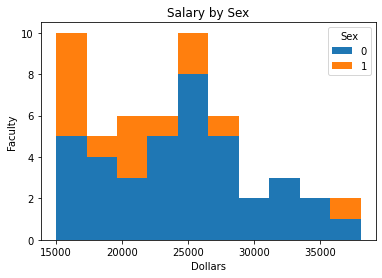

In [36]:
df.pivot_table(index=df.index, columns='Sex', values='Salary') \
    .plot(kind='hist',  stacked=True,title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

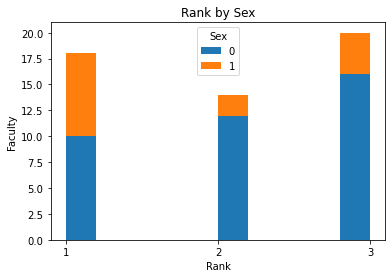

In [37]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist',  stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()